# Project: Data_Pre-Processing
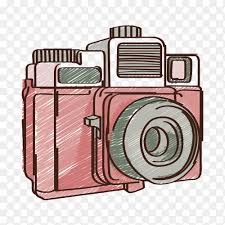

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
test_df = pd.read_csv('./titanic/test.csv', index_col="PassengerId")

In [11]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


# Feature Classification: Categorical vs Numerical
- Categorical: survised, Sex, Embarked, Pclass (ordinal), SibSp, Parch
- Numerical: (continuous) Age, Fare (discrete)
- Mix types od data: Ticket, Cabin
- Contain Error/Typo: Name
- Blank or Null: Cabin > Age > Embarked
- Various Data Type: String, Int, Float

In [14]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [15]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [17]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
        
convert_cat(train_df, features)
convert_cat(test_df, features)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [19]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [20]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# EDA


## EDA for Categorical Features

### Target Variable: Survived

In [21]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [22]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


### Sex

In [23]:
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [24]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

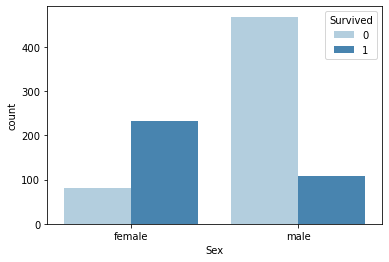

In [25]:
sns.countplot(data=train_df, x='Sex',hue='Survived', palette='Blues')

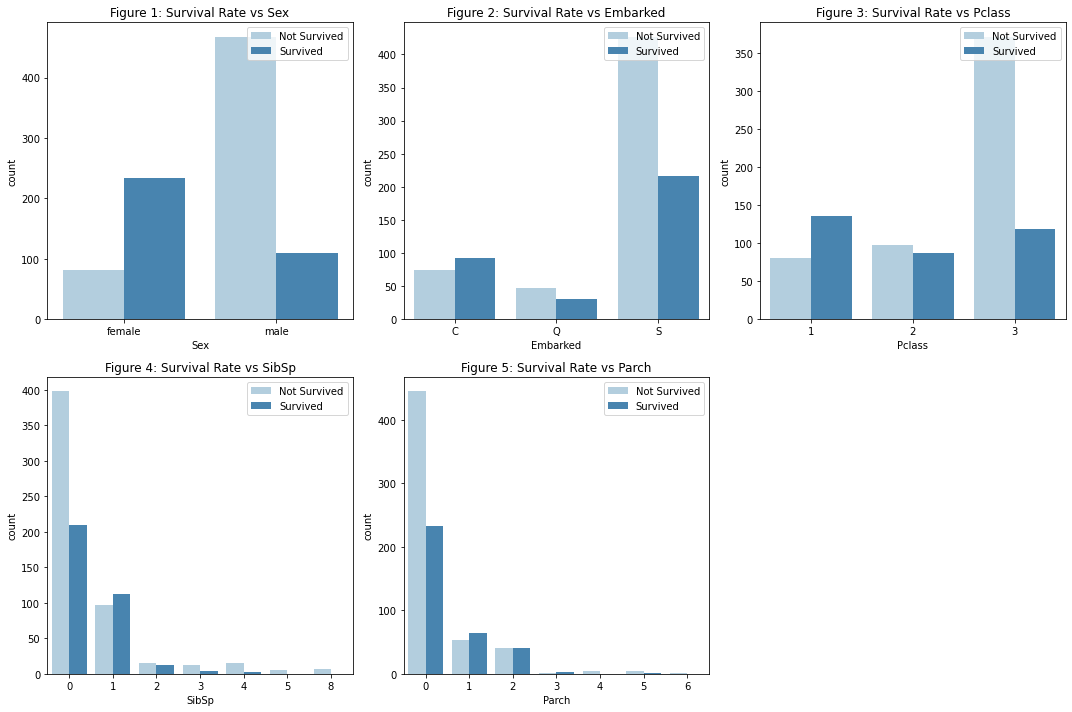

In [26]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
            

ax.flat[-1].set_visible(False)            
plt.tight_layout()

## Observation
* **Survived Rate**:
    - Fig 1: Female survival rate > male
    - Fig 2: Most people embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate
    - Fig 4: People going with 0 `SibSp` are mostly not survived and the number of passenger with 1-2 family members has a better chance of suvival
    - Fig 5: People going with 0 `Parch` are mostly not survived

## EDA for Numerical Features

### Age

<Axes: xlabel='Age', ylabel='Count'>

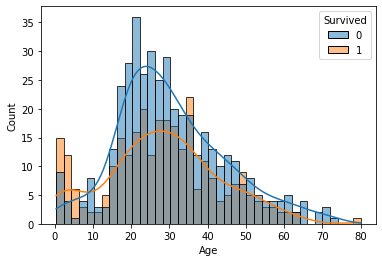

In [27]:
sns.histplot(data=train_df, x='Age',hue='Survived', bins = 40, kde=True)

In [28]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

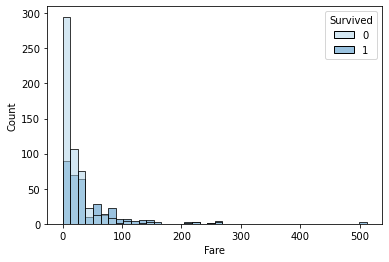

In [29]:
sns.histplot(data=train_df, x='Fare', bins = 40, hue='Survived', palette='Blues')

<Axes: xlabel='Fare', ylabel='count'>

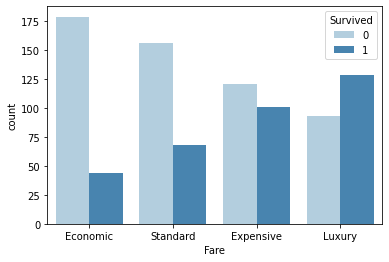

In [30]:
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartitle_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartitle_data, hue=train_df['Survived'], palette='Blues')

In [31]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

# Feature Engineering & Data Wrangling

## Feature Engineering

### Name

In [32]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [33]:
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

In [34]:
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [35]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [36]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [37]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [38]:
train_df['Title'] = train_df['Title'].apply(lambda s: s if s in ['Mr', 'Mrs', 'Miss', 'Master'] else "Others")
test_df['Title'] = test_df['Title'].apply(lambda s: s if s in ['Mr', 'Mrs', 'Miss', 'Master'] else "Others")

In [39]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

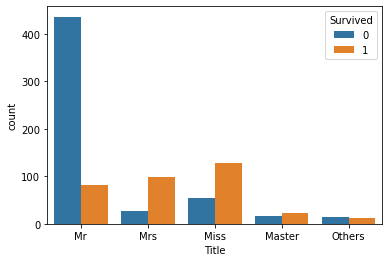

In [40]:
sns.countplot(data=train_df, x='Title', hue='Survived')

### Family

In [41]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [42]:
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [43]:
train_df['Family_Cat'] = pd.cut(train_df['Family_size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large'])

<Axes: xlabel='Family_Cat', ylabel='count'>

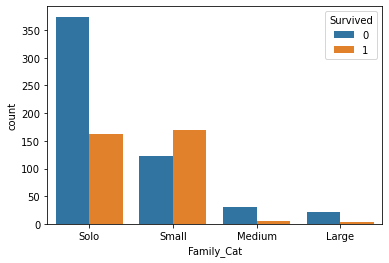

In [44]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived')

## Data Wrangling

In [45]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [46]:
def missing_value(df, feature_cols):
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count} missing value.")

In [47]:
print("---Train dataset---")
missing_value(train_df, feature_cols)
print("\n---Testing dataset---")
missing_value(test_df, feature_cols)

---Train dataset---
Col Age has 177 missing value.
Col Embarked has 2 missing value.

---Testing dataset---
Col Age has 86 missing value.
Col Fare has 1 missing value.


### Filling missing values

In [48]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo


#### Transform `male` and `female` to `1` and `0`

In [49]:
train_df['Sex'] = train_df['Sex'].map({"male": 1, "female": 0})

In [50]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Family_Cat
PassengerId,,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S,Others,1,Solo
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S,Miss,1,Solo
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss,4,Small
890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C,Mr,1,Solo
891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q,Mr,1,Solo


In [51]:
print(train_df['Embarked'].value_counts(ascending=True))
print(train_df['Embarked'].value_counts(normalize=True, ascending=True))

Embarked
Q     77
C    168
S    644
Name: count, dtype: int64
Embarked
Q    0.086614
C    0.188976
S    0.724409
Name: proportion, dtype: float64


#### Filling missing value with `S`

In [52]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

#### Transform `S`, `C`, `Q` in `Embarked` to `0`, `1`, `2`

In [53]:

train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#### Transform Title column

In [54]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64

In [55]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,3,2,Small
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,3,2,Small
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,1,Solo


#### Drop `Name`, `Ticket`, `Cabin` columns

In [56]:
train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [57]:
train_df['Family_Cat'].value_counts()

Family_Cat
Solo      537
Small     292
Medium     37
Large      25
Name: count, dtype: int64

#### Transform 

In [58]:
family_mapping = {"Solo": 1, "Small": 2, "Medium": 3, "Large": 4}
train_df['Family_Cat'] = train_df['Family_Cat'].map(family_mapping)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Family_Cat
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,1,2,2
2,1,1,0,38.0,1,0,71.2833,1,3,2,2
3,1,3,0,26.0,0,0,7.9250,0,2,1,1
4,1,1,0,35.0,1,0,53.1000,0,3,2,2
5,0,3,1,35.0,0,0,8.0500,0,1,1,1


#### Filling `Age` column

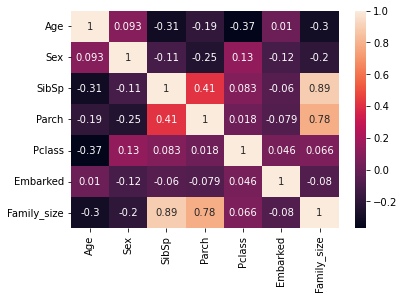

In [59]:
age_heat = sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass","Embarked", "Family_size"]].corr(),annot=True)
plt.show() 

In [91]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()


In [92]:
age_by_sex_pclass

Sex  Pclass
0    1         36.724219
     2         29.000000
     3         23.803363
1    1         40.545778
     2         31.696376
     3         27.665475
Name: Age, dtype: float64

In [93]:
train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.interpolate() if x.notnull().any() else x)


Sex  Pclass  PassengerId
0    1       2              38.000000
             4              35.000000
             12             58.000000
             32             42.485306
             53             49.000000
                              ...    
1    3       878            19.000000
             879            26.460808
             882            33.000000
             885            25.000000
             891            32.000000
Name: Age, Length: 891, dtype: float64

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
train_data = train_df[train_df['Age'].notnull()]
test_data = train_df[train_df['Age'].isnull()]

# Define the features and target variable
X_train = train_data.drop(['Age'], axis=1)
y_train = train_data['Age']
X_test = test_data.drop(['Age'], axis=1)

# Train a random forest regressor to predict the missing values
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Use the trained model to predict the missing values
predicted_ages = rf.predict(X_test)
train_df.loc[train_df['Age'].isnull(), 'Age'] = predicted_ages


In [94]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Family_Cat
PassengerId,,,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0,1,2,2
2,1,1,0,38.000000,1,0,71.2833,1,3,2,2
3,1,3,0,26.000000,0,0,7.9250,0,2,1,1
4,1,1,0,35.000000,1,0,53.1000,0,3,2,2
5,0,3,1,35.000000,0,0,8.0500,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,0,5,1,1
888,1,1,0,19.000000,0,0,30.0000,0,2,1,1
889,0,3,0,10.948333,1,2,23.4500,0,2,4,2


In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Sex          891 non-null    category
 3   Age          891 non-null    float64 
 4   SibSp        891 non-null    category
 5   Parch        891 non-null    category
 6   Fare         891 non-null    float64 
 7   Embarked     891 non-null    category
 8   Title        891 non-null    int64   
 9   Family_size  891 non-null    int32   
 10  Family_Cat   891 non-null    category
dtypes: category(7), float64(2), int32(1), int64(1)
memory usage: 38.8 KB
